# Cost Complexity Pruning and Decision Tree Evaluation in Python
This notebook covers the use of cost complexity pruning (CCP) in decision trees using Python's `scikit-learn` library. We'll explore code snippets to grow a full tree, identify optimal pruning parameters, and compare different `ccp_alpha` values.


## 1. Example Code: Cost Complexity Pruning in Python
First, we grow a decision tree classifier on the Iris dataset and use the `cost_complexity_pruning_path` method to find effective values for the `ccp_alpha` parameter.

Then, we evaluate model performance at each pruning level and select the best `ccp_alpha` based on cross-validation.

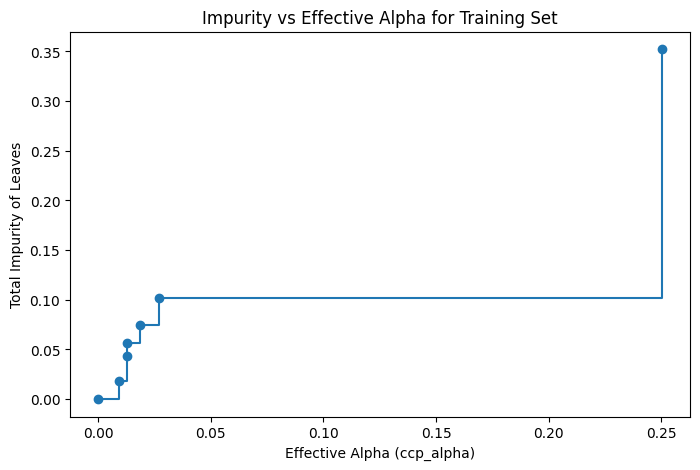

In [1]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset and split into training and testing sets
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Train an unpruned decision tree and extract the ccp_alpha path
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot impurities vs. ccp_alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel("Total Impurity of Leaves")
plt.title("Impurity vs Effective Alpha for Training Set")
plt.show()


## 2. Cross-Validate Different `ccp_alpha` Values
Using the generated `ccp_alpha` values, we cross-validate the model with each value to find the best pruning level. The optimal `ccp_alpha` will minimize overfitting while keeping model complexity reasonable.

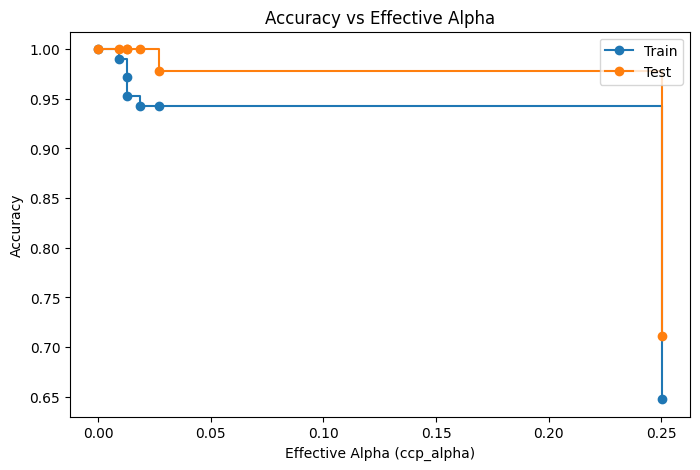

In [2]:

# Perform cross-validation to select the best `ccp_alpha`
train_scores = []
test_scores = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plot training and testing accuracy vs alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Effective Alpha")
plt.show()


## 3. Train Final Model with Optimal `ccp_alpha`
After identifying the optimal `ccp_alpha` value that balances training and test accuracy, we train a pruned decision tree using this alpha value.

In [3]:

# Find the best alpha based on test scores
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print(f"Optimal ccp_alpha: {best_alpha}")

# Train a pruned model with the optimal `ccp_alpha`
clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)
print(f"Pruned Model Accuracy on Test Set: {clf_pruned.score(X_test, y_test)}")


Optimal ccp_alpha: 0.0
Pruned Model Accuracy on Test Set: 1.0
